<a href="https://colab.research.google.com/github/KrishnaPandya-VGEC-IT/LZ77-algorithm/blob/master/Vaidehi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import requests
import io
import re 
import nltk
import string
import warnings

In [2]:
pd.set_option("display.max_colwidth",200) 
warnings.filterwarnings("ignore") #ignore warnings

In [3]:
fields = ['tweet_id','text','created_at','country_code']
df = pd.read_csv('/content/tweets.csv',usecols=fields,dtype={'text':str})
df.head(20)

,tweet_id,text,created_at,country_code
0,1246833590165368832,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US
1,1246833587489370113,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US
2,1246833584435908618,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US
3,1246833568837443584,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US
4,1246833560109092867,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US
5,1246833557135183872,"We're hiring in #Spartanburg, SC! Click the link in our bio to apply to this job and more: Assembly (3rd Shift) at… https://t.co/GjEdIQHXvu",Sun Apr 05 16:14:19 +0000 2020,US
6,1246833556606685185,"If you're looking for work in #Greensboro, NC, check out this job: https://t.co/ozEO1oYR7c #BusinessMgmt",Sun Apr 05 16:14:19 +0000 2020,US
7,1246833538881556486,"Morningside of Paris is looking for teammates like you. See our latest #Nursing job openings, including \Resident A… https://t.co/1wAE82HCPH""",Sun Apr 05 16:14:15 +0000 2020,US
8,1246833505423638528,"See our latest Dayton, OH DMI ACCT GROUP job opportunity and click the link in our bio to apply: ELINT Intelligence… https://t.co/nbMNhxeofM",Sun Apr 05 16:14:07 +0000 2020,US
9,1246833505322991621,"Want to work at Comerica Bank? We're hiring in #Dallas, TX! Click for details: https://t.co/ZilFudwZGj #Retail",Sun Apr 05 16:14:07 +0000 2020,US


**Data_Cleaning**

In [4]:
#removing tweet_id columns to focus only on tweets

df.drop(['tweet_id'],axis = 1, inplace = True)
df.head(10)


,text,created_at,country_code
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US
5,"We're hiring in #Spartanburg, SC! Click the link in our bio to apply to this job and more: Assembly (3rd Shift) at… https://t.co/GjEdIQHXvu",Sun Apr 05 16:14:19 +0000 2020,US
6,"If you're looking for work in #Greensboro, NC, check out this job: https://t.co/ozEO1oYR7c #BusinessMgmt",Sun Apr 05 16:14:19 +0000 2020,US
7,"Morningside of Paris is looking for teammates like you. See our latest #Nursing job openings, including \Resident A… https://t.co/1wAE82HCPH""",Sun Apr 05 16:14:15 +0000 2020,US
8,"See our latest Dayton, OH DMI ACCT GROUP job opportunity and click the link in our bio to apply: ELINT Intelligence… https://t.co/nbMNhxeofM",Sun Apr 05 16:14:07 +0000 2020,US
9,"Want to work at Comerica Bank? We're hiring in #Dallas, TX! Click for details: https://t.co/ZilFudwZGj #Retail",Sun Apr 05 16:14:07 +0000 2020,US


In [5]:
# removing @ symbol if any [replacing it from space
df['Proper_text'] = df['text'].str.replace("@","")

In [6]:
df.head()

,text,created_at,country_code,Proper_text
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ"""
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO"
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7"
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ"""
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr"


In [7]:
df['Proper_text'] = df['text'].str.split('https').str[0]


In [8]:
df.head()

,text,created_at,country_code,Proper_text
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref…"
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,Join the Vail Health team! See our latest job opening here:
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi…"
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc…
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo…"


In [9]:
df['Proper_text'] = df['Proper_text'].str.replace("I","")

In [10]:
#removing punctuations, numbers and special characters

df['Proper_text'] = df['Proper_text'].str.replace("[^a-zA-Z]"," ")
df['Proper_text'].astype(str)
df.head()

,text,created_at,country_code,Proper_text
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,Don t be shy Score a job like FT Sales Floor Dept Supervisor Flooring D cor Day at Lowe s by asking for ref
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,Join the Vail Health team See our latest job opening here
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,Thompson Health is hiring in Canandaigua NY Read about our latest Healthcare job opening via the link in our bi
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,Bartending while at home because why not m suppose to be on vacation in Cali so wife decided she wanted a stayc
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go it starts Got a lo


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Proper_text'].astype(str)
df.dtypes

text            object
created_at      object
country_code    object
Proper_text     object
dtype: object

In [13]:
df['Proper_text'] = df['Proper_text'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
df

,text,created_at,country_code,Proper_text
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,Don shy Score job like FT Sales Floor Dept Supervisor Flooring D cor Day Lowe asking ref
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,Join Vail Health team See latest job opening
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,Thompson Health hiring Canandaigua NY Read latest Healthcare job opening via link bi
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,Bartending home suppose vacation Cali wife decided wanted stayc
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,Requested suggestions sketches jacklenihanart suggested Solid Snake MGS go starts Got lo
...,...,...,...,...
31087,"See our latest Springfield, MO Nursing job opportunity and click the link in our bio to apply: Registered Nurse-Med… https://t.co/MbrZzCHPvV",Tue Apr 07 18:57:07 +0000 2020,US,See latest Springfield MO Nursing job opportunity click link bio apply Registered Nurse Med
31088,Nervous to apply for a job like \Wireless - Retail Sales Associate - Homewood,"IL\"" at OSL? Apply even if you're not… https://t.co/ZTIma4CKBl""",en,Nervous apply job like Wireless Retail Sales Associate Homewood
31089,"This job is now open at Banner Health in #Greeley, CO. Follow us and turn on mobile alerts to hear about jobs like… https://t.co/5kII3nM47b",Tue Apr 07 18:57:02 +0000 2020,US,This job open Banner Health Greeley CO Follow us turn mobile alerts hear jobs like
31090,Kindness rocks! These are rocks from our ECI Oasis Summer Camp! The idea is to put them around your neighborhood… https://t.co/dYcWWHa6Pg,Tue Apr 07 18:57:00 +0000 2020,US,Kindness rocks These rocks EC Oasis Summer Camp The idea put around neighborhood


In [15]:
df['Proper_text'] = df['Proper_text'].astype(str).apply(lambda x: x.split())
df.head()

,text,created_at,country_code,Proper_text
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,"[Don, shy, Score, job, like, FT, Sales, Floor, Dept, Supervisor, Flooring, D, cor, Day, Lowe, asking, ref]"
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,"[Join, Vail, Health, team, See, latest, job, opening]"
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,"[Thompson, Health, hiring, Canandaigua, NY, Read, latest, Healthcare, job, opening, via, link, bi]"
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,"[Bartending, home, suppose, vacation, Cali, wife, decided, wanted, stayc]"
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,"[Requested, suggestions, sketches, jacklenihanart, suggested, Solid, Snake, MGS, go, starts, Got, lo]"


In [16]:
df['Proper_text'] = df['Proper_text'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,text,created_at,country_code,Proper_text
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,Don shy Score job like FT Sales Floor Dept Supervisor Flooring D cor Day Lowe asking ref
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,Join Vail Health team See latest job opening
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,Thompson Health hiring Canandaigua NY Read latest Healthcare job opening via link bi
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,Bartending home suppose vacation Cali wife decided wanted stayc
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,Requested suggestions sketches jacklenihanart suggested Solid Snake MGS go starts Got lo


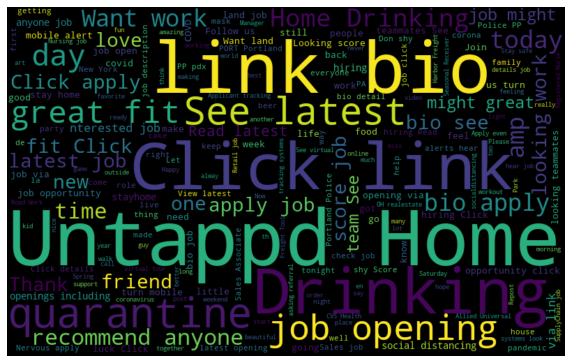

In [17]:
all_words = ' '.join([text for text in df['Proper_text']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [18]:
df['Day'] = df['created_at'].str[0:7]
df.head(1000)

,text,created_at,country_code,Proper_text,Day
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,Don shy Score job like FT Sales Floor Dept Supervisor Flooring D cor Day Lowe asking ref,Sun Apr
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,Join Vail Health team See latest job opening,Sun Apr
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,Thompson Health hiring Canandaigua NY Read latest Healthcare job opening via link bi,Sun Apr
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,Bartending home suppose vacation Cali wife decided wanted stayc,Sun Apr
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,Requested suggestions sketches jacklenihanart suggested Solid Snake MGS go starts Got lo,Sun Apr
...,...,...,...,...,...
995,"Have you ever had a role like \Clinical Supervisor\""? What did you like most about that job? #SocialSciences #Weymouth","MA""",en,Have ever role like Clinical Supervisor What like job SocialSciences Weymouth,"MA"""
996,Don't be shy. Score a job like \Wireless - Retail Sales Associate - Plymouth,"WI\"" at OSL by asking for referrals. I… https://t.co/5XFMStZJjn""",en,Don shy Score job like Wireless Retail Sales Associate Plymouth,"WI\"" a"
997,"Harbor Freight Tools is hiring in #Lawrence, KS! Read about our latest #SupplyChain job opening via the link in our… https://t.co/XBucaFA5Du",Sun Apr 05 15:29:52 +0000 2020,US,Harbor Freight Tools hiring Lawrence KS Read latest SupplyChain job opening via link,Sun Apr
998,Looking to score a job at Follett Corporation? You're in luck. Click the link in our bio for the job description an… https://t.co/J4AICKBg3K,Sun Apr 05 15:29:52 +0000 2020,US,Looking score job Follett Corporation You luck Click link bio job description,Sun Apr


In [19]:
temp_df = df.loc[(df['Day'] == 'Sun Apr') | (df['Day']=='Sat Apr') | (df['Day']=='Mon Apr') | (df['Day'] == 'Tue Apr') | (df['Day'] == 'Wed Apr') | (df['Day']=='Thur Apr') | (df['Day']=='Fri Apr')] #Take only rows with valid date value. All values are frm Apr
temp_df.describe()

,text,created_at,country_code,Proper_text,Day
count,30130,30130,30120,30130,30130
unique,29968,25046,5,28019,5
top,Cleared: Road Work - ORANGE #RT15 South at Exit 58 (RTE 34) at 4/7/2020 3:20:09 PM,Tue Apr 07 19:21:33 +0000 2020,US,,Sun Apr
freq,2,9,28171,36,7786


In [20]:
final_df = temp_df.loc[(df['country_code']== 'US') | (df['country_code']=='CA') | (df['country_code']=='MX')] #take only 3 countries other rows are discarded
final_df.head(500)
final_df.describe()

,text,created_at,country_code,Proper_text,Day
count,30102,30102,30102,30102,30102
unique,29940,25022,3,27991,5
top,Cleared: Road Work - ROCKY HILL #I91 North at Exit 24 (RTE 99) at 4/8/2020 1:06:06 PM,Tue Apr 07 19:21:33 +0000 2020,US,,Sun Apr
freq,2,9,28171,36,7778


In [21]:
final_df['Day'] =df['created_at'].str[0:13] #take upto day,hrs
final_df.head()

,text,created_at,country_code,Proper_text,Day
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,Don shy Score job like FT Sales Floor Dept Supervisor Flooring D cor Day Lowe asking ref,Sun Apr 05 16
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,Join Vail Health team See latest job opening,Sun Apr 05 16
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,Thompson Health hiring Canandaigua NY Read latest Healthcare job opening via link bi,Sun Apr 05 16
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,Bartending home suppose vacation Cali wife decided wanted stayc,Sun Apr 05 16
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,Requested suggestions sketches jacklenihanart suggested Solid Snake MGS go starts Got lo,Sun Apr 05 16


In [22]:
grpby = final_df.groupby(['country_code','Day']) #using groupby
grpby.head()

,text,created_at,country_code,Proper_text,Day
0,"Don't be shy. Score a job like \FT - Sales Floor Dept Supervisor- Flooring-Décor - Day\"" at Lowe's by asking for ref… https://t.co/9AbO7BmeoZ""",Sun Apr 05 16:14:27 +0000 2020,US,Don shy Score job like FT Sales Floor Dept Supervisor Flooring D cor Day Lowe asking ref,Sun Apr 05 16
1,"Join the Vail Health team! See our latest job opening here: https://t.co/zEvKmLqpVG #Nursing #Vail, CO",Sun Apr 05 16:14:26 +0000 2020,US,Join Vail Health team See latest job opening,Sun Apr 05 16
2,"Thompson Health is hiring in #Canandaigua, NY! Read about our latest #Healthcare job opening via the link in our bi… https://t.co/HdfhXMhIY7",Sun Apr 05 16:14:26 +0000 2020,US,Thompson Health hiring Canandaigua NY Read latest Healthcare job opening via link bi,Sun Apr 05 16
3,"Bartending while at home because why not. I'm suppose to be on vacation in Cali so wife decided she wanted a \stayc… https://t.co/NsJO3OVvLZ""",Sun Apr 05 16:14:22 +0000 2020,US,Bartending home suppose vacation Cali wife decided wanted stayc,Sun Apr 05 16
4,"Requested suggestions for sketches jacklenihanart suggested Solid Snake from MGS so here we go, it starts. Got a lo… https://t.co/ihgE1Tj7hr",Sun Apr 05 16:14:20 +0000 2020,US,Requested suggestions sketches jacklenihanart suggested Solid Snake MGS go starts Got lo,Sun Apr 05 16
...,...,...,...,...,...
31022,"Ok I get it, we have our moments as well. But catch my morning cardio video at 9am. Then clients get training video… https://t.co/WO8CoAgedG",Tue Apr 07 18:59:46 +0000 2020,US,Ok get moments well But catch morning cardio video Then clients get training video,Tue Apr 07 18
31023,"Interested in a job in New Orleans, LA? This could be a great fit. Click the link in our bio to apply: Outside Sale… https://t.co/sfgaXwgK3D",Tue Apr 07 18:59:43 +0000 2020,US,nterested job New Orleans LA This could great fit Click link bio apply Outside Sale,Tue Apr 07 18
31024,Take home 2 pint Crowler. - Drinking a Shakedown Street by @melwoodbeerco @ Untappd at Home — https://t.co/WjTYRwLsb7,Tue Apr 07 18:59:41 +0000 2020,US,Take home pint Crowler Drinking Shakedown Street melwoodbeerco Untappd Home,Tue Apr 07 18
31025,Drinking a Jamestown by @thornbridge @ Untappd at Home — https://t.co/zJEhncmoXt,Tue Apr 07 18:59:39 +0000 2020,US,Drinking Jamestown thornbridge Untappd Home,Tue Apr 07 18


In [23]:
df2 = grpby.sum()

In [24]:
df2.head(4000)

text  ...                                                                                                                                                                                              Proper_text
country_code Day                                                                                                                                                                                                                     ...                                                                                                                                                                                                         
CA           Mon Apr 06 02  @stroughtonsmith Great job steve!No food makes me as happy as rice does! Naturally, been wanting to make cooking Dum Biryani, and when I stumbled up… https://t.co/mZwuoBAz6b🌙 #nightnight #linashek...  ...  stroughtonsmith Great job steveNo food makes happy rice Naturally wanting make cooking Dum Biryani stumblednightnight linashek stayhome Toronto Ontariobees With COVD situation full effect taking p...
             Mon Apr 06 03  Made waffles for y'all. Who wants them? Two waffles per bag. Primarily for the kids though (and not adultish age ki… https://t.co/00b8za95ieThe countdown to the kid’s bedtime is on!! 🙌🏻 In just a ...  ...  Made waffles Who wants Two waffles per bag Primarily kids though adultish age kiThe countdown kid bedtime n minutes free snack making amp lookingThank shopping us find HARBYLAWLAR etsy tap pre ord...
             Mon Apr 06 04  #betterbiggerbusier @soojandra @century21canada @Reachbandleader join us live April 6 at 1:00pm to be inspired and… https://t.co/adxeDa1hsSWork isn't the only thing I brought home with me... :-) @...  ...  betterbiggerbusier soojandra century canada Reachbandleader join us live April pm inspiredWork thing brought home Lethbridge AlbertaAn update Sylvan Food Bank peoplehelpingpeople inittogether thes...
             Mon Apr 06 05  This weekend was so much better than the others. We seem to have slowed down enough to just enjoy being home. We ma… https://t.co/1J3fM4lSACFirst thing I’m doing when we are cleared to go back out...  ...  This weekend much better others We seem slowed enough enjoy home WeFirst thing cleared go back hosting sick car cruise seatosky highway cruiseLiterally procrastinating school work days continuousl...
             Mon Apr 06 06  What NOT to do in a pandemic...\nCover your mouth, Eddie, jeeze!\n#venom #eddiebrock #marvel #monster #teeth #tongue… https://t.co/BQpdFqiyv9Stay home!🏡Stay safe!😷Save a life!💕 Flatten the curve!⚠...  ...  What NOT pandemic Cover mouth Eddie jeeze venom eddiebrock marvel monster teeth tongueStay home Stay safe Save life Flatten curve Covid Day home safe blessed thankful ReginThere toilet paper short...
...                                                                                                                                                                                                                             ...  ...                                                                                                                                                                                                      ...
US           Wed Apr 08 16  Fresh roasting continues for special orders and Subscription. Stay home and make delicious coffee! ⛾❤ @ caffe d'bol… https://t.co/AjwTEzwWDsCheck out our #listing in #Circleville #OH  #realestate ...  ...  Fresh roasting continues special orders Subscription Stay home make delicious coffee caffe bolCheck listing Circleville OH realestate realtorThis job open The Everett Clinic part Optum Everett WA ...
             Wed Apr 08 17  Interested in a job in #Ontario, CA? This could be a great fit: https://t.co/68wqY8CflA #FacilitiesMgmtPollo tropical at night doing conovruis oof imagine 🤔 #miamiflorida #miami #home #miamiflorid...  ...  nterested job Ontario CA This could great fitPollo tropical night conovruis oof ima

In [25]:
 df2.describe()

,text,created_at,Proper_text
count,154,154,154
unique,154,154,154
top,This weekend was so much better than the others. We seem to have slowed down enough to just enjoy being home. We ma… https://t.co/1J3fM4lSACFirst thing I’m doing when we are cleared to go back out...,Mon Apr 06 03:58:39 +0000 2020Mon Apr 06 03:54:33 +0000 2020Mon Apr 06 03:48:12 +0000 2020Mon Apr 06 03:32:03 +0000 2020Mon Apr 06 03:26:31 +0000 2020Mon Apr 06 03:20:10 +0000 2020Mon Apr 06 03:12...,When skills years quarantine Quarantine ke dream come true ToronSocial distancing going conversation havent done Unfriendly mage VERY long timTo prevent spread COVD decided serve customers appoint...
freq,1,1,1


In [26]:
from collections import Counter


In [27]:
max_word = []


In [28]:
for i in range(0,len(df2['Proper_text'])):
  temp_word =  Counter(df2['Proper_text'].iloc[i].split()).most_common(1)
  max_word.append(temp_word) #will find max_word and store it in list

In [29]:
df2['max_word'] = max_word #creates new column and adds the maximum occurring word 

In [30]:
list_each_word = []
list_each_count = []
c = 0
for i in df2['max_word']:
  for j in i[0]:
    if c % 2 == 0:
      list_each_word.append(j)
      c += 1
    else:
      list_each_count.append(j)
      c += 1

df2['each_word'] = list_each_word
df2['each_count'] = list_each_count


In [31]:
df2.head(4000)

text  ... each_count
country_code Day                                                                                                                                                                                                                     ...           
CA           Mon Apr 06 02  @stroughtonsmith Great job steve!No food makes me as happy as rice does! Naturally, been wanting to make cooking Dum Biryani, and when I stumbled up… https://t.co/mZwuoBAz6b🌙 #nightnight #linashek...  ...          3
             Mon Apr 06 03  Made waffles for y'all. Who wants them? Two waffles per bag. Primarily for the kids though (and not adultish age ki… https://t.co/00b8za95ieThe countdown to the kid’s bedtime is on!! 🙌🏻 In just a ...  ...          3
             Mon Apr 06 04  #betterbiggerbusier @soojandra @century21canada @Reachbandleader join us live April 6 at 1:00pm to be inspired and… https://t.co/adxeDa1hsSWork isn't the only thing I brought home with me... :-) @...  ...          4
             Mon Apr 06 05  This weekend was so much better than the others. We seem to have slowed down enough to just enjoy being home. We ma… https://t.co/1J3fM4lSACFirst thing I’m doing when we are cleared to go back out...  ...          2
             Mon Apr 06 06  What NOT to do in a pandemic...\nCover your mouth, Eddie, jeeze!\n#venom #eddiebrock #marvel #monster #teeth #tongue… https://t.co/BQpdFqiyv9Stay home!🏡Stay safe!😷Save a life!💕 Flatten the curve!⚠...  ...          2
...                                                                                                                                                                                                                             ...  ...        ...
US           Wed Apr 08 16  Fresh roasting continues for special orders and Subscription. Stay home and make delicious coffee! ⛾❤ @ caffe d'bol… https://t.co/AjwTEzwWDsCheck out our #listing in #Circleville #OH  #realestate ...  ...        271
             Wed Apr 08 17  Interested in a job in #Ontario, CA? This could be a great fit: https://t.co/68wqY8CflA #FacilitiesMgmtPollo tropical at night doing conovruis oof imagine 🤔 #miamiflorida #miami #home #miamiflorid...  ...        317
             Wed Apr 08 18  BIG shout to @eviemaesbbq  for lunch for NSS today! Y’all are the best! #teamumc #nourishment @ UMC Health System https://t.co/qWV8hwNfOcIf you're looking for work in #Nampa, ID, check out this jo...  ...        269
             Wed Apr 08 19  Scenes from quarantine, day eleventy-billion: a brief taste of summer in early April. @ Eureka, Missouri https://t.co/FJtmwEvSWuDirect from the brewery #BuyLocal - Drinking a Wanderlust by Allenda...  ...        293
             Wed Apr 08 20  This job is now open at Oakwood Worldwide in #CrystalCity, VA. Follow us and turn on mobile alerts to hear about jo… https://t.co/iubTAnZET1We're hiring in #NewYork, NY! Click the link in our bio ...  ...         99

[154 rows x 6 columns]

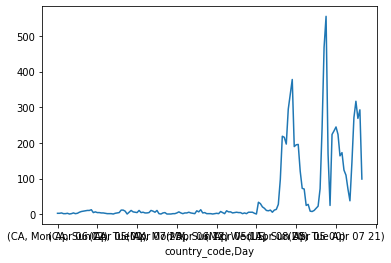

In [32]:
df2['each_count'].plot()

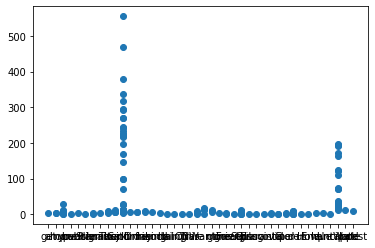

In [33]:
plt.scatter(df2['each_word'],df2['each_count'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.

In [34]:
pip install mpld3

     |████████████████████████████████| 1.0MB 5.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=b9128e43aa7c0d62c7f107013bea98a65ffa5c1ab82f3ca262b1c6daf643132e
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [35]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

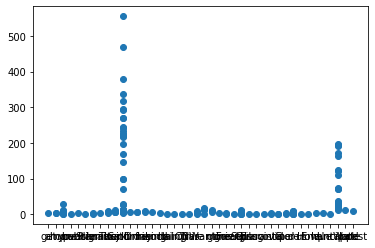

In [36]:
plt.scatter(df2['each_word'],df2['each_count'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.

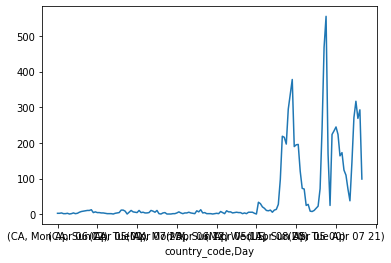

In [37]:
df2['each_count'].plot()

In [38]:
df2.head(5)

text  ... each_count
country_code Day                                                                                                                                                                                                                     ...           
CA           Mon Apr 06 02  @stroughtonsmith Great job steve!No food makes me as happy as rice does! Naturally, been wanting to make cooking Dum Biryani, and when I stumbled up… https://t.co/mZwuoBAz6b🌙 #nightnight #linashek...  ...          3
             Mon Apr 06 03  Made waffles for y'all. Who wants them? Two waffles per bag. Primarily for the kids though (and not adultish age ki… https://t.co/00b8za95ieThe countdown to the kid’s bedtime is on!! 🙌🏻 In just a ...  ...          3
             Mon Apr 06 04  #betterbiggerbusier @soojandra @century21canada @Reachbandleader join us live April 6 at 1:00pm to be inspired and… https://t.co/adxeDa1hsSWork isn't the only thing I brought home with me... :-) @...  ...          4
             Mon Apr 06 05  This weekend was so much better than the others. We seem to have slowed down enough to just enjoy being home. We ma… https://t.co/1J3fM4lSACFirst thing I’m doing when we are cleared to go back out...  ...          2
             Mon Apr 06 06  What NOT to do in a pandemic...\nCover your mouth, Eddie, jeeze!\n#venom #eddiebrock #marvel #monster #teeth #tongue… https://t.co/BQpdFqiyv9Stay home!🏡Stay safe!😷Save a life!💕 Flatten the curve!⚠...  ...          2

[5 rows x 6 columns]

In [39]:
df2.size

924

country_code
CA    AxesSubplot(0.125,0.125;0.775x0.755)
MX    AxesSubplot(0.125,0.125;0.775x0.755)
US    AxesSubplot(0.125,0.125;0.775x0.755)
Name: each_count, dtype: object

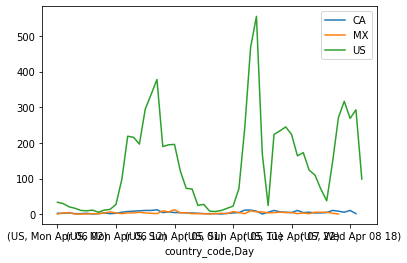

In [40]:
#df2.groupby(['country_code']).plot()
df2.groupby('country_code')['each_count'].plot(legend=True)
#plt.axes().set_xticklabels(df2['created_at'].str[0:13])